## Regression
- Goal: predict Boston's future home prices
- Method: Linear Regression using sklearn
- Data: dataset obtained from sklearn dataset library
- Author: Carlos Caballero / Data Scientist

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import sklearn
import math
%matplotlib inline

In [2]:
# Load data
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Convert data dictionary to dataframe
df = pd.DataFrame(boston.data, columns = boston.feature_names).dropna()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.shape

(506, 13)

In [6]:
# Add target to dataframe
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [9]:
# I would also like to know variance, median, skeness, and kurtosis for variables of interest
# Create a function that will give me everything

class Stats:
    def __init__(self, feature):
        self.minimum = np.min(feature)
        self.maximum = np.max(feature)
        self.mean = np.mean(feature)
        self.median = np.median(feature)
        self.variance = np.var(feature)
        self.std = np.std(feature)
        self.skew = skew(feature)
        self.kurtosis = kurtosis(feature)
        self.histogram = plt.hist(feature, color = 'green', alpha = 0.5)
        plt.title('Histogram')
        plt.ylabel('Frequency')
        plt.xlabel('Values')
        plt.show()
                        
    def desc_stats(self):
        print("Min: {:0.2f}".format(self.minimum))
        print("Max: {:0.2f}".format(self.maximum))
        print("Mean: {:0.2f}".format(self.mean))
        print("Median: {:0.2f}".format(self.median))
        print("Variance: {:0.2f}".format(self.variance))
        print("Standard Deviation: {:0.2f}".format(self.std))
        print("Skewness: {:0.2f}".format(self.skew))
        print("Kurtosis: {:0.2f}".format(self.kurtosis))
        print(self.histogram)
        

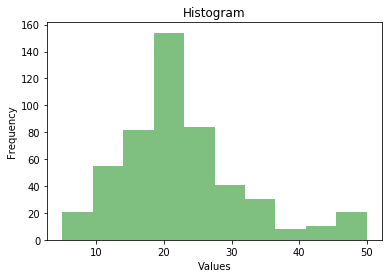

Min: 5.00
Max: 50.00
Mean: 22.53
Median: 21.20
Variance: 84.42
Standard Deviation: 9.19
Skewness: 1.10
Kurtosis: 1.47
(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]), array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]), <a list of 10 Patch objects>)


In [10]:
price = Stats(df['PRICE'])
price.desc_stats()

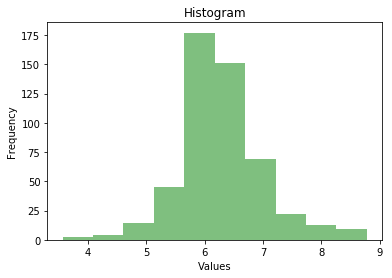

Min: 5.00
Max: 50.00
Mean: 22.53
Median: 21.20
Variance: 84.42
Standard Deviation: 9.19
Skewness: 1.10
Kurtosis: 1.47
(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]), array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]), <a list of 10 Patch objects>)


In [11]:
room = Stats(df['RM'])
price.desc_stats()

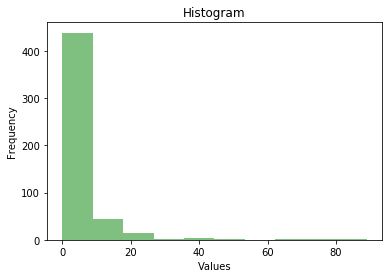

Min: 0.01
Max: 88.98
Mean: 3.61
Median: 0.26
Variance: 73.84
Standard Deviation: 8.59
Skewness: 5.21
Kurtosis: 36.75
(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]), array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
       3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
       7.1182224e+01, 8.0079212e+01, 8.8976200e+01]), <a list of 10 Patch objects>)


In [12]:
crime = Stats(df['CRIM'])
crime.desc_stats()

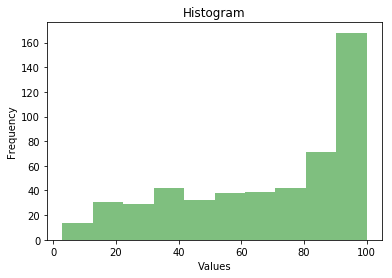

Min: 2.90
Max: 100.00
Mean: 68.57
Median: 77.50
Variance: 790.79
Standard Deviation: 28.12
Skewness: -0.60
Kurtosis: -0.97
(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]), array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
        80.58,  90.29, 100.  ]), <a list of 10 Patch objects>)


In [13]:
age = Stats(df['AGE'])
age.desc_stats()

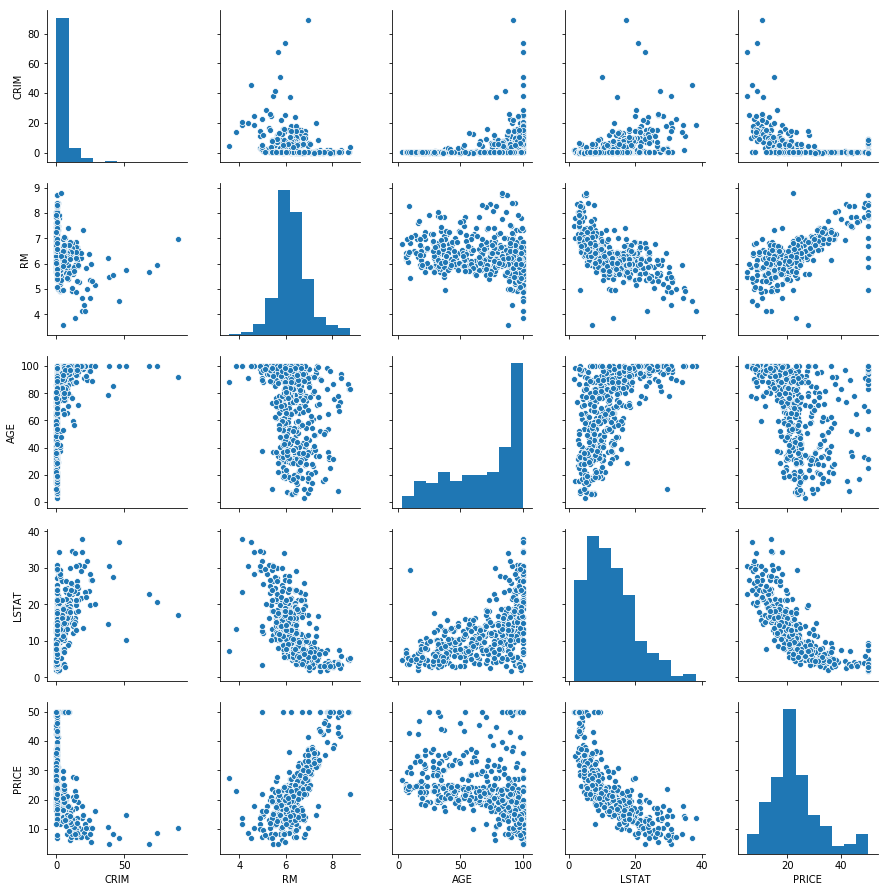

In [17]:
# Examine correlation
sns.pairplot(features)

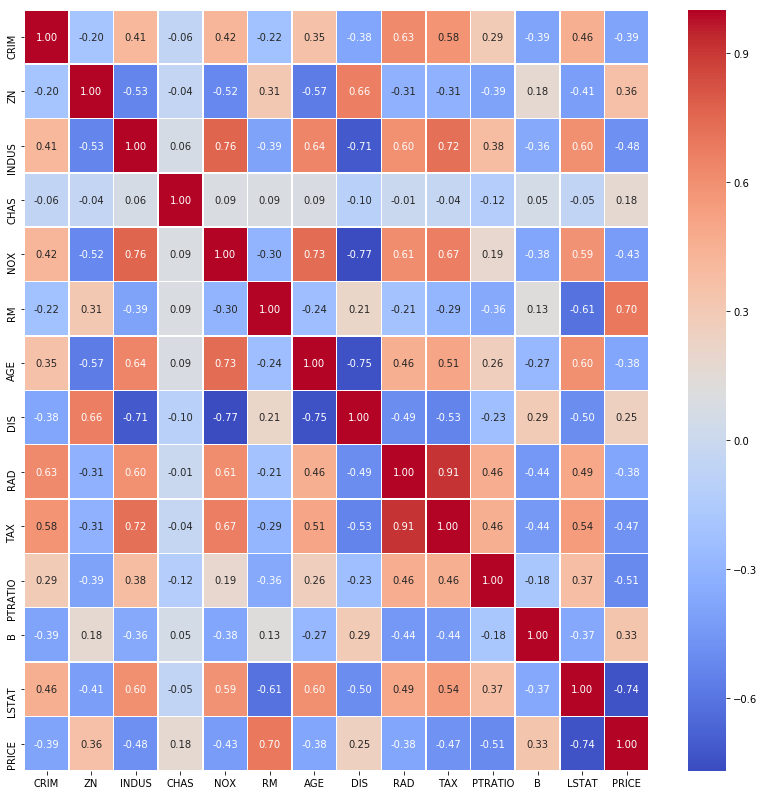

In [47]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidth = 0.5, annot_kws={"size": 10}, ax=ax)

#### Based on the heatmap, I'm interested in the following variables:
- CRIM
- RM
- AGE
- LSTAT
- PRICE (target)

In [16]:
# Examine features of interest
features = df[['CRIM', 'RM', 'AGE', 'LSTAT', 'PRICE']]

In [53]:
# Check for multicollenarity 
# Calculate Variance Inflation Factor (VIF)
# Get variables for which to compute VIF and add intercept term

# Compute and view VIF
vif = pd.DataFrame()
vif["features"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif)

  features        VIF
0     CRIM   1.522198
1       RM  36.783065
2      AGE  11.476481
3    LSTAT   9.862249
4    PRICE  19.834872


## Regression Models

In [54]:
X = df[['CRIM', 'RM', 'AGE']]
y = df['PRICE']

In [57]:
# Create train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(379, 3) (127, 3)
(379,) (127,)


In [72]:
# Train model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)


[-0.2267704   8.34433901 -0.04748341]


In [73]:
# Make predictions
y_hat = reg.predict(X_test)

### Evaluate Model

In [74]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,y_hat))

Variance score: 0.4984


In [76]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,y_hat))

MAE: 3.8758


In [77]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,y_hat))

MSE: 35.1614


In [78]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_hat))
print('RMSE: %.4f' % rmse)

RMSE: 5.9297


In [79]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,y_hat))

R2: 0.4979


### Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train,y_train)

# The coefficients
print ('Coefficients: ', ridge_reg.coef_)

Coefficients:  [-0.2273709   8.29877969 -0.04768813]


In [83]:
#Predict
ridge_yhat = ridge_reg.predict(X_test)

### Evaluate Ridge

In [84]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,y_hat))

Variance score: 0.4984


In [85]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,ridge_yhat))

MAE: 3.8773


In [86]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,ridge_yhat))

MSE: 35.1118


In [87]:
rmse = sqrt(mean_squared_error(y_test, ridge_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 5.9255


In [88]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,ridge_yhat))

R2: 0.4986


### Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)

# The coefficients
print ('Coefficients: ', lasso_reg.coef_)

Coefficients:  [-0.22803651  8.13989237 -0.04841276]


In [90]:
# Predict
lasso_yhat = lasso_reg.predict(X_test)

### Evaluate Lasso

In [91]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,lasso_yhat))

Variance score: 0.5017


In [92]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,lasso_yhat))

MAE: 3.8810


In [93]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,lasso_yhat))

MSE: 34.9380


In [94]:
# Root Mean Square Error
rmse = sqrt(mean_squared_error(y_test, lasso_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 5.9108


In [95]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,lasso_yhat))

R2: 0.5011


### Elastic Net

In [96]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', elastic_net.coef_)

Coefficients:  [-0.23761194  7.46550055 -0.05144003]


In [97]:
# Predict
elastic_yhat = elastic_net.predict(X_test)

In [98]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,elastic_yhat))

Variance score: 0.5091


In [99]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,elastic_yhat))

MAE: 3.9217


In [100]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,elastic_yhat))

MSE: 34.4773


In [101]:
# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, elastic_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 5.8717


In [102]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,elastic_yhat))

R2: 0.5077


### Model Performance Summary

#### Elastic Net regression performed slightly better than its counterparts

### Model Output

In [104]:
# Attach Elastic Net predictions to original dataframe

df_yhat = pd.DataFrame(elastic_yhat)
df_yhat.columns  = ['PREDICTION']
np.asanyarray(df_yhat[['PREDICTION']])


df_model_output = pd.merge(df,df_yhat,how = 'left',left_index = True, right_index = True)
df_model_output.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,23.631719
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,28.827047
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,19.639671
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,24.936236
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,21.159559
